In [1]:
import sys, os, getpass, warnings
warnings.filterwarnings('ignore')
#sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.path.realpath("__file__")), '..', 'src')))  # append parent directory to search path
from patterns.visualizer import Visualizer

Bring in data from database and annotate it with *locc*, *locc+*, *locc-*, *change-size-cos* = *1-similarity* (**expensive call**)

In [2]:
vis = Visualizer(project_name='spack', db_pwd=getpass.getpass(prompt='Database password:'))
vis.get_data()

Database password: ·······


In [3]:
all_commits = vis.commit_data
all_commits.head()

,sha,branch,author,message,filepath,diff,year,month,day,doy,dow,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,,,,,,,,
2021-02-16 11:01:06,67874420c78eb986282ea4e0f531d66929c1de70,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,bump openkim-models to 2021.01.28 (#21637),var/spack/repos/builtin/packages/openkim-model...,"- url = ""https://s3.openkim.org/archiv...",2021,2,16,47,Tuesday,5,1,4,0.379826
2021-02-11 18:10:45,f92580240e8e4b50b68d4a26a0c6286a096dcd4f,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,Add support for KIM package in LAMMPS (#21638),var/spack/repos/builtin/packages/lammps/packag...,"+ variant('kim', default=True,\n+ ...",2021,2,11,42,Thursday,5,0,5,1.000000
2020-12-17 08:44:33,12378db0d8eec62fc9f7cfbadd4e1291d4da9bc4,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added v2.2.1 (#20382),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2020,12,17,352,Thursday,3,1,2,0.366505
2019-08-20 07:29:17,7737d623b02dc2ce112114632830f2a9609777b9,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.3 (#12457),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,8,20,232,Tuesday,3,1,2,0.366505
2019-07-31 00:13:13,86ff5baed72dc119c372a0640245b561bd8ecfbf,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.2 (#12189),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,7,31,212,Wednesday,3,1,2,0.366505


## Remove all noncode files
The determination of what is code is made by including common suffixes, as well as checking manually a sampling of ECP projects for the suffixes used for things that can be labeled as code (vs. input simulation data, documentation, or generated files).

In [4]:
vis.remove_noncode()
print("Removed %d noncode files!" % (all_commits.shape[0] - vis.commit_data.shape[0]))
vis.commit_data.head()

Removed 3919 noncode files!


,sha,branch,author,message,filepath,diff,year,month,day,doy,dow,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,,,,,,,,
2021-02-16 11:01:06,67874420c78eb986282ea4e0f531d66929c1de70,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,bump openkim-models to 2021.01.28 (#21637),var/spack/repos/builtin/packages/openkim-model...,"- url = ""https://s3.openkim.org/archiv...",2021,2,16,47,Tuesday,5,1,4,0.379826
2021-02-11 18:10:45,f92580240e8e4b50b68d4a26a0c6286a096dcd4f,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,Add support for KIM package in LAMMPS (#21638),var/spack/repos/builtin/packages/lammps/packag...,"+ variant('kim', default=True,\n+ ...",2021,2,11,42,Thursday,5,0,5,1.000000
2020-12-17 08:44:33,12378db0d8eec62fc9f7cfbadd4e1291d4da9bc4,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added v2.2.1 (#20382),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2020,12,17,352,Thursday,3,1,2,0.366505
2019-08-20 07:29:17,7737d623b02dc2ce112114632830f2a9609777b9,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.3 (#12457),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,8,20,232,Tuesday,3,1,2,0.366505
2019-07-31 00:13:13,86ff5baed72dc119c372a0640245b561bd8ecfbf,* develop\n remotes/origin/HEAD -> origin/dev...,Ryan S. Elliott,kim-api: added version 2.1.2 (#12189),var/spack/repos/builtin/packages/kim-api/packa...,"- url = ""https://s3.openkim.org/kim-ap...",2019,7,31,212,Wednesday,3,1,2,0.366505


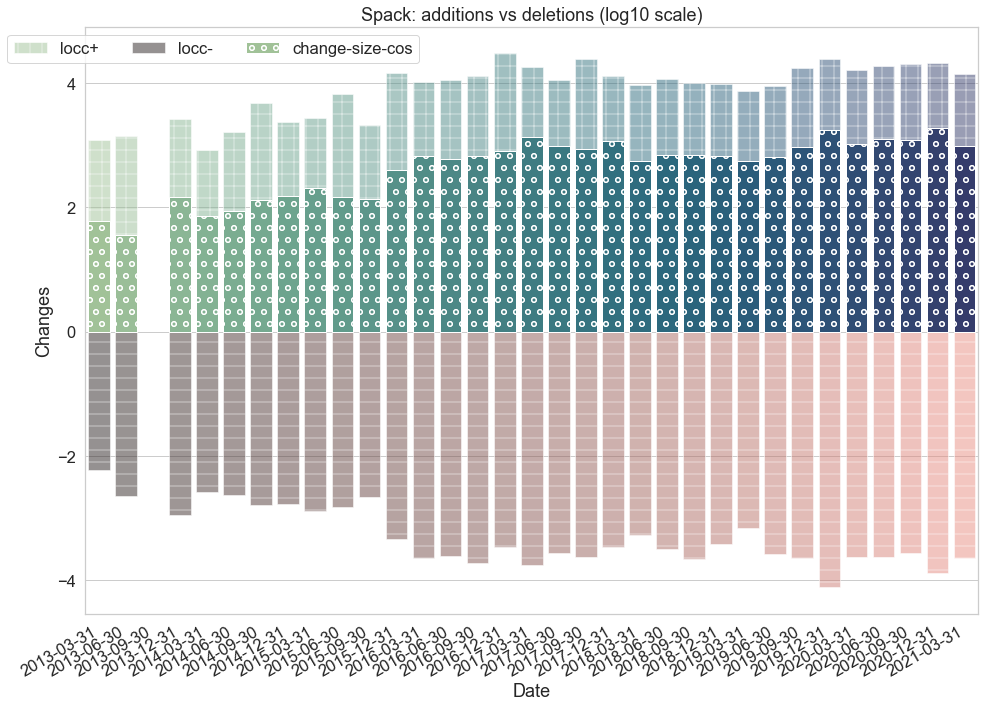

In [5]:
df = vis.plot_overall_project_locc(time_range=None, log=True)

to focus on a given year and/or month, set *year* and *month* fields

In [6]:
vis.set_year(2020)
vis.set_month(7)

to plot for a given year, provide *time_range='year'*

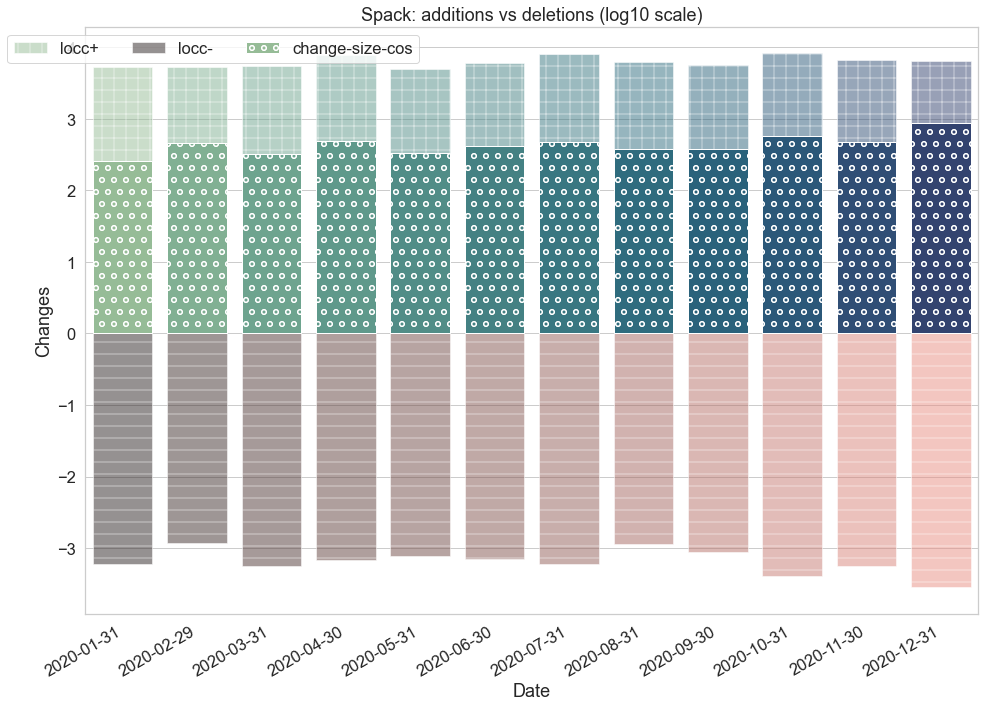

In [7]:
df = vis.plot_overall_project_locc(time_range='year',log=True)

similarly to plot for a given month, set *time_range='month'*

,year,month,day,doy,locc,locc-,locc+,change-size-cos,date
datetime,,,,,,,,,
2020-07-01,20200,70,10,1830,365,-2.193125,2.320146,0.920611,2020-07-01
2020-07-02,40400,140,40,3680,161,-1.278754,2.152288,1.136895,2020-07-02
2020-07-03,10100,35,15,925,70,-0.477121,1.826075,0.580587,2020-07-03
2020-07-04,8080,28,16,744,141,-1.079181,2.110590,0.431884,2020-07-04
2020-07-05,34340,119,85,3179,84,-1.301030,1.806180,0.988033,2020-07-05
2020-07-06,18180,63,54,1692,195,-1.176091,2.255273,0.471785,2020-07-06
2020-07-07,38380,133,133,3591,193,-1.431364,2.220108,0.840617,2020-07-07
2020-07-08,48480,168,192,4560,1190,-1.230449,3.069298,1.312069,2020-07-08
2020-07-09,26260,91,117,2483,79,-1.146128,1.812913,0.869157,2020-07-09


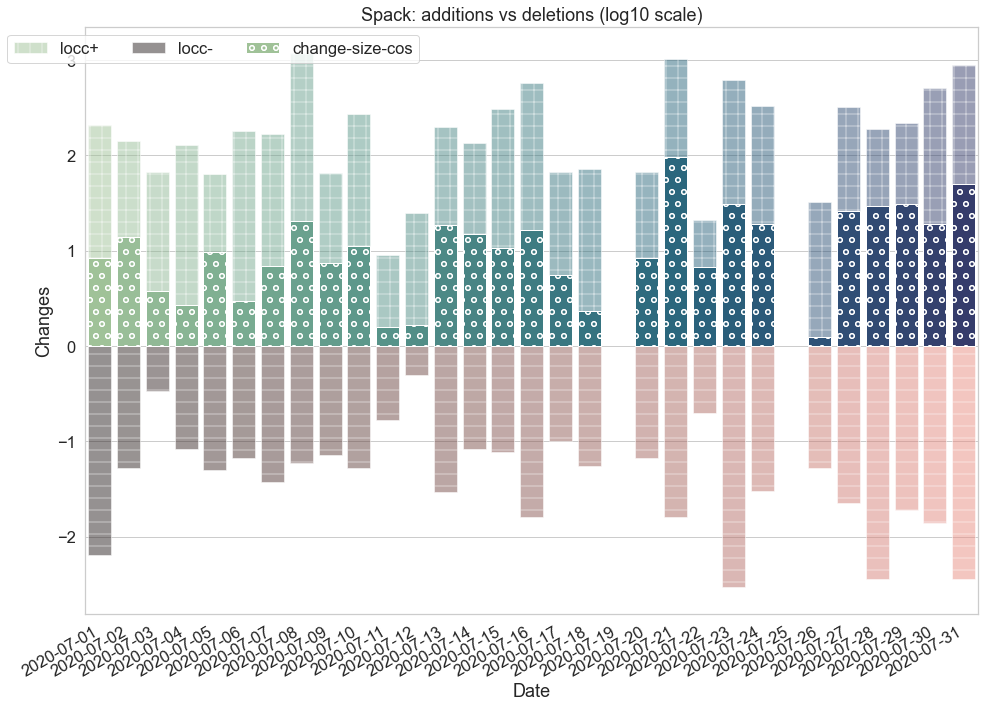

In [8]:
vis.plot_overall_project_locc(time_range='month',log=True)

### Averages: Total changed lines over time

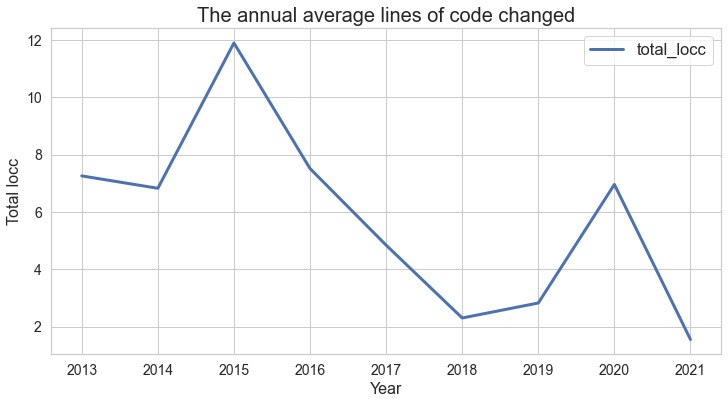

In [9]:
vis.plot_total_locc_avg()

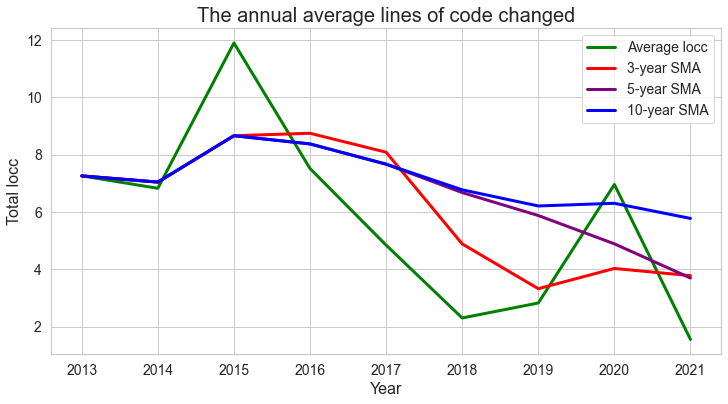

In [10]:
vis.plot_total_locc_moving_avgs()

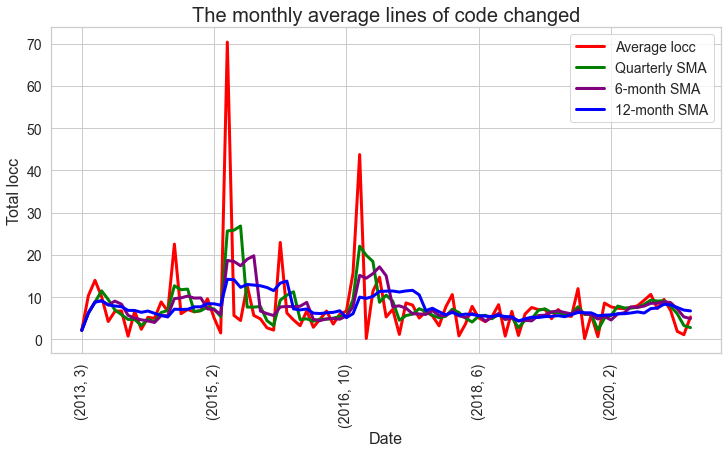

In [11]:
vis.plot_total_locc_moving_avgs_M()

## Total changed lines over time
This reflects changed lines of code as reported in git commit diffs.

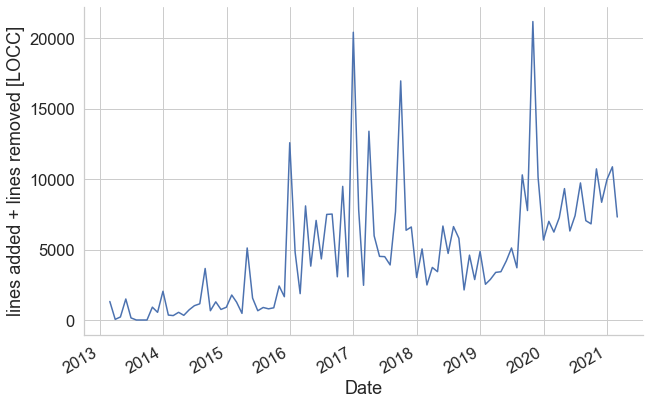

In [12]:
df = vis.plot_project_locc_line()

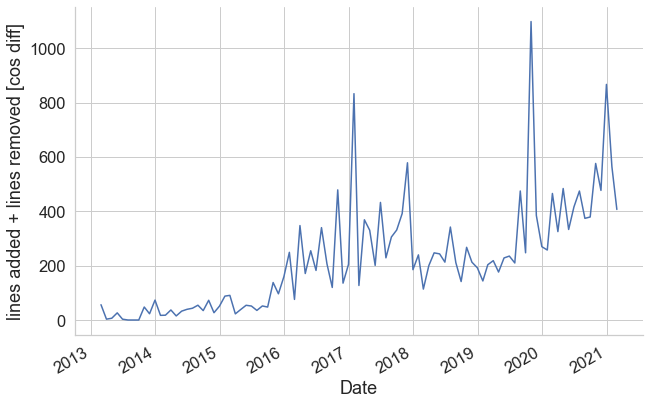

In [13]:
df2 = vis.plot_project_locc_line(locc=False)

,year,month,day,doy,locc,locc-,locc+,change-size-cos
datetime,,,,,,,,
2013-02-28 00:00:00+00:00,213378,212,1945,5231,1313,159,1154,56.312206
2013-03-31 00:00:00+00:00,24156,36,270,978,46,7,39,3.129232
2013-04-30 00:00:00+00:00,24156,48,48,1128,216,37,179,6.492891
2013-05-31 00:00:00+00:00,104676,260,612,6852,1491,375,1116,26.291430
2013-06-30 00:00:00+00:00,14091,42,203,1260,149,30,119,3.039233


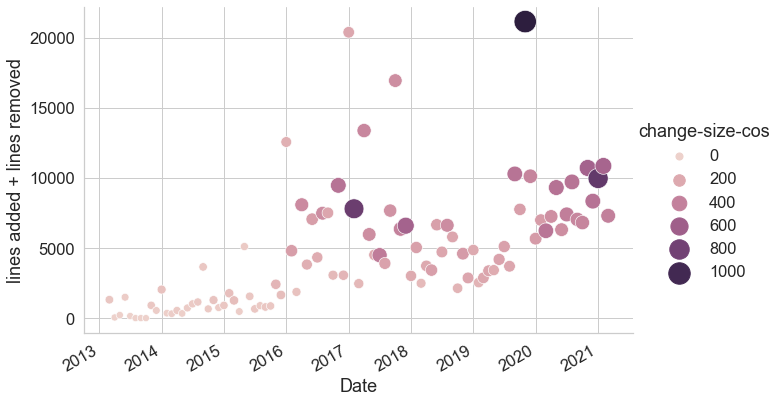

In [14]:
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df2, x="datetime", y="locc", size="change-size-cos", hue="change-size-cos", sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

### Using a distance metric to adjust the size of the changes

We use the python [textdistance](https://github.com/life4/textdistance) module. The following algorithms have been integrated with the visualizer.
```
'cos', 'hamming', 'damerau_levenshtein', 'jaccard', 'jaro', 'jaro_winkler', 'bag', 'editex'
```

In [ ]:
diff_alg = 'jaccard'
df = vis.plot_project_locc_line(diff_alg=diff_alg, log=False)
import seaborn as sns
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    g = sns.relplot(data=df, x="datetime", y="locc", size="change-size-%s" % diff_alg, hue="change-size-%s" % diff_alg, sizes=(50, 500),
                    height=6, aspect=1.5, kind="scatter")
    g.ax.set_xlabel('Date')
    g.ax.set_ylabel('lines added + lines removed')
    g.fig.autofmt_xdate()
    g.fig.show()
df.head()

## Change size over time

In [ ]:
df = vis.plot_proj_change_size(time_range=None)

Similarly, we can 'zoom' into a specific year

In [ ]:
vis.plot_proj_change_size(time_range='year')

Or a specific year range

In [ ]:
vis.select_year_range(2018,2020)
vis.plot_proj_change_size(time_range='year-year')

we can zoom into a month

In [ ]:
vis.plot_proj_change_size(time_range='month')

Or a month range

In [ ]:
vis.select_month_range(5,11)
vis.plot_proj_change_size(time_range='month-month')

## More patterns
Here we look at a combination of the the high-churn and domain champion patterns. Basically we are focusing on the files that have the most changes and restricting the developers by those with the biggest contributions.

In [ ]:
N = 10
vis.set_max_label_length(30)
top_N = vis.plot_top_N_heatmap(N, value_column='locc')
top_N.head()

In [ ]:
import seaborn as sns
top_N = vis.plot_top_N_heatmap(N, value_column='change-size-cos')
top_N.head()

In [ ]:
from patterns.patterns import Patterns
df = vis.commit_data

In [ ]:
vis.reset()
vis.annotate_metrics(diff_alg='cos')
file_dev_locc = vis.make_file_developer_df(value_column='locc')
file_dev_diff = vis.make_file_developer_df(value_column='change-size-cos')

In [ ]:
diff_df = file_dev_locc.sub(file_dev_diff, axis=0)
print(diff_df.shape)
diff_df.head()

In [ ]:
df = vis.commit_data
df['locc-cos diff'] = df['locc']-df['change-size-cos']
d = vis.plot_top_N_heatmap(top_N = 10, value_column='locc-cos diff', my_df=df)

In [ ]:
#= vis.plot_top_N_heatmap(20,my_df=diff_df)